In [1]:
import pandas as pd # dataframes
import numpy as np   # arrays and math operations
from sklearn.model_selection import train_test_split   # for splitting datasets into training and testing sets
import matplotlib.pyplot as plt  # plotting

# k-nearest neighbours algorithm for classification
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import itertools
import matplotlib.patches as mpatches #coloring the points

from sklearn.model_selection import GridSearchCV

In [33]:
#reading the file and making them into features and targets
df = pd.read_csv('imputed_data.csv')
X = df.drop(columns=['koi_disposition'])  
y = df['koi_disposition']  


In [34]:
class_labels = ['CONFIRMED', 'FALSE POSITIVE']
df_two_classes = df[df['koi_disposition'].isin(class_labels)]

# Split the dataset into features (X) and target variable (y)
X = df_two_classes.drop(columns=['koi_disposition'])
y = df_two_classes['koi_disposition']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

# accuracy of the kNN classifier
accuracy = knn_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# make predictions for test vectors
predictions = knn_classifier.predict(X_test)
print("Predictions for test vectors:", predictions)

Accuracy: 0.7700087950747582
Predictions for test vectors: ['FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' ... 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']


In [36]:
y_train_pred = knn_classifier.predict(X_train) # predictions on the training data

y_test_pred = knn_classifier.predict(X_test) # Predictions on test data

# confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# precision, recall, and F1-score for training data
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_score_train = f1_score(y_train, y_train_pred, average='macro')

# precision, recall, and F1-score for test data
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_score_test = f1_score(y_test, y_test_pred, average='macro')


Confusion Matrix (Test Data):
[[ 647  196]
 [ 327 1104]]

Performance Metrics:
Precision (Test Data): 0.7567509082293477
Recall (Test Data): 0.7694927520013131
F1-Score (Test Data): 0.7603289813222973
Confusion matrix, without normalization
Normalized confusion matrix


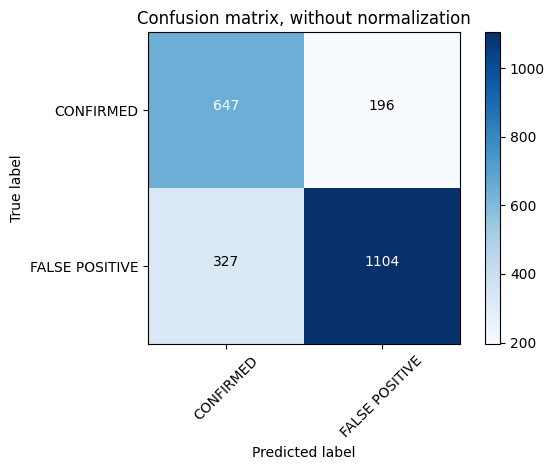

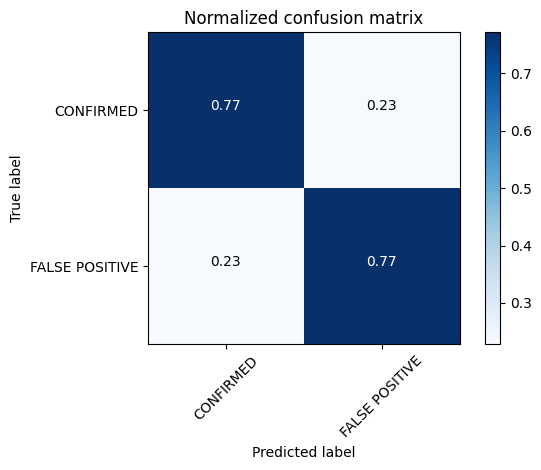

In [37]:
# Confusion Matrix
print("Confusion Matrix (Test Data):")
print(conf_matrix_test)

# Precision, Recall, and F1-Score
print("\nPerformance Metrics:")
print("Precision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_score_test)

# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_test, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_test, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


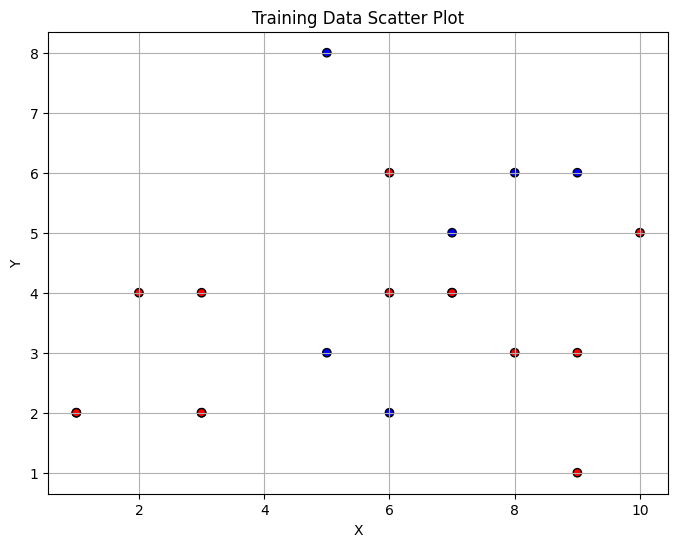

In [39]:
def question_3():
    X = np.random.randint(1, 11, size=(20, 4))

    # Generate random class labels for each data point
    classes = np.random.randint(0, 2, size=20)
    
    # Color mapping for classes: class0 - Blue, class1 - Red
    colors = ['blue' if cls == 0 else 'red' for cls in classes]

    # Plotting the training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolors='k')
    plt.title('Training Data Scatter Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
    
question_3()


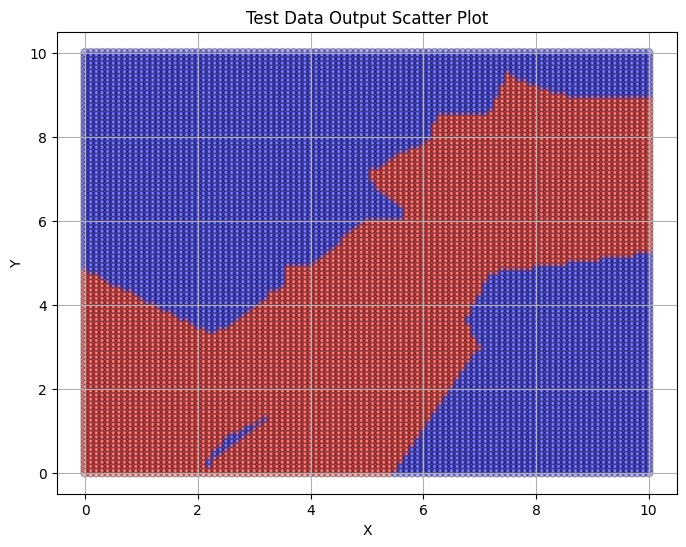

In [40]:
def question_4(k):
    np.random.seed(0)  # For reproducibility
    X = np.random.randint(1, 11, size=(20, 2))

    # Generate random class labels for each data point
    classes = np.random.randint(0, 3, size=20)
    
    # Color mapping for classes: class0 - Blue, class1 - Red
    colors = ['blue' if cls == 0 else 'red' for cls in classes]
    
    x_values_test = np.arange(0, 10.1, 0.1)
    y_values_test = np.arange(0, 10.1, 0.1)
    xx_test, yy_test = np.meshgrid(x_values_test, y_values_test)
    test_data = np.column_stack([xx_test.ravel(), yy_test.ravel()])

    # Classify test points using kNN classifier trained on the training data
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X, classes)  
    predicted_classes = knn_classifier.predict(test_data)

    # Color mapping for predicted classes: class0 - Blue, class1 - Red
    predicted_colors = ['blue' if cls == 0 else 'red' for cls in predicted_classes]

    # Plotting the test data output
    plt.figure(figsize=(8, 6))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_colors, marker='o', edgecolors='k', alpha=0.3)
    plt.title('Test Data Output Scatter Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

    
question_4(3)

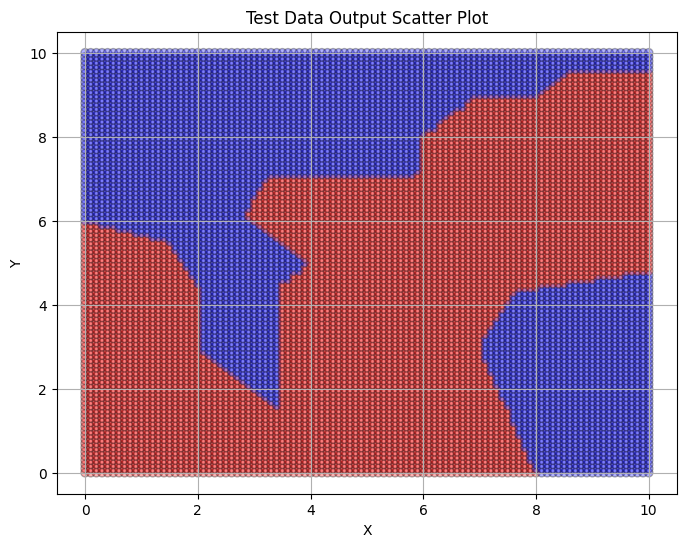

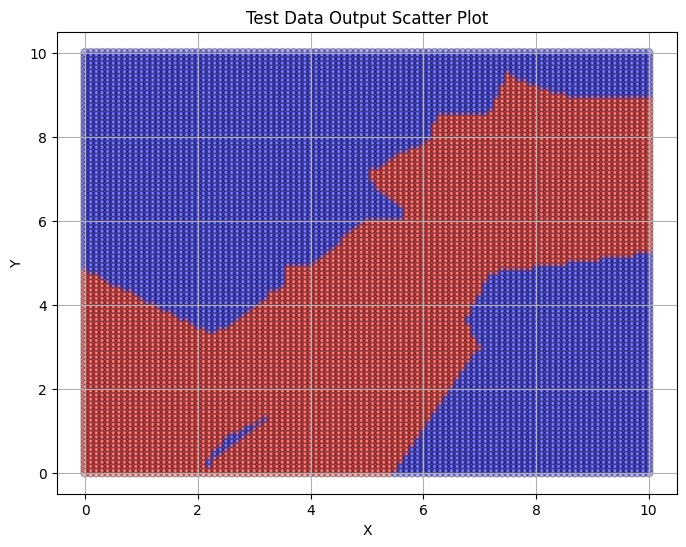

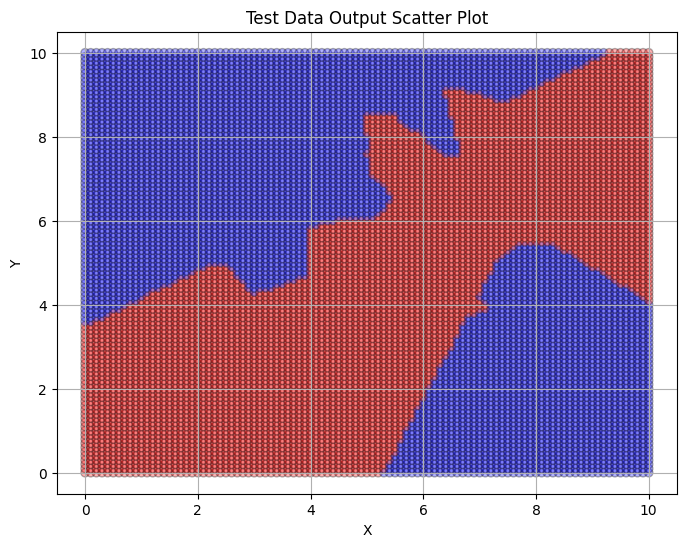

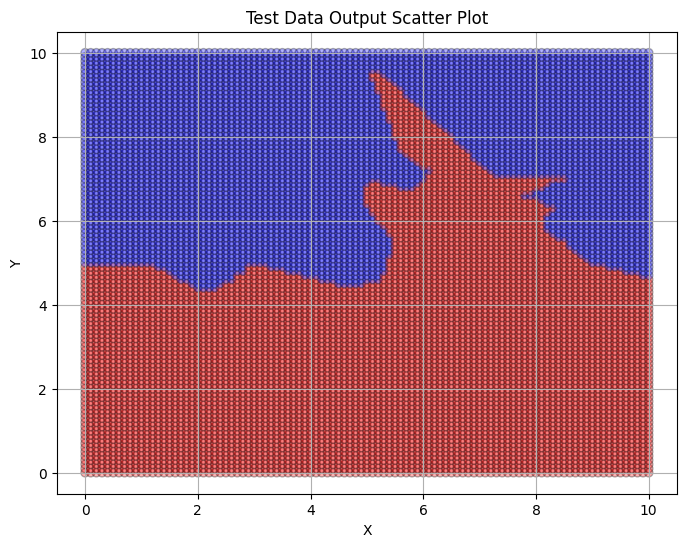

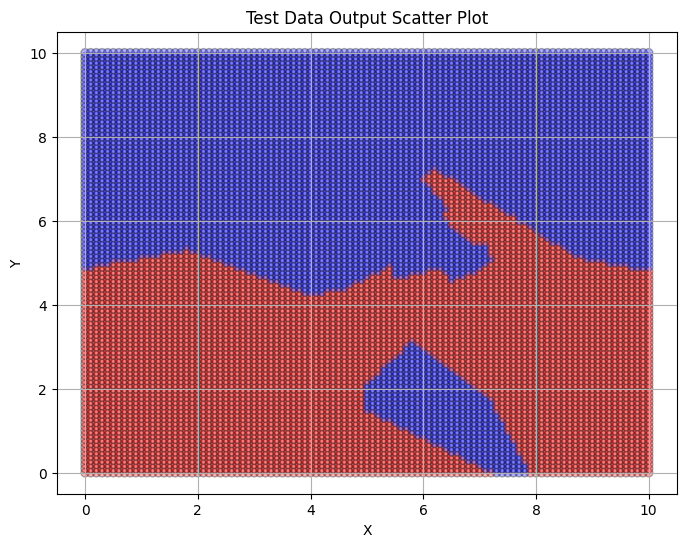

In [41]:
for k in [1, 3, 5, 7, 9]:
    question_4(k)

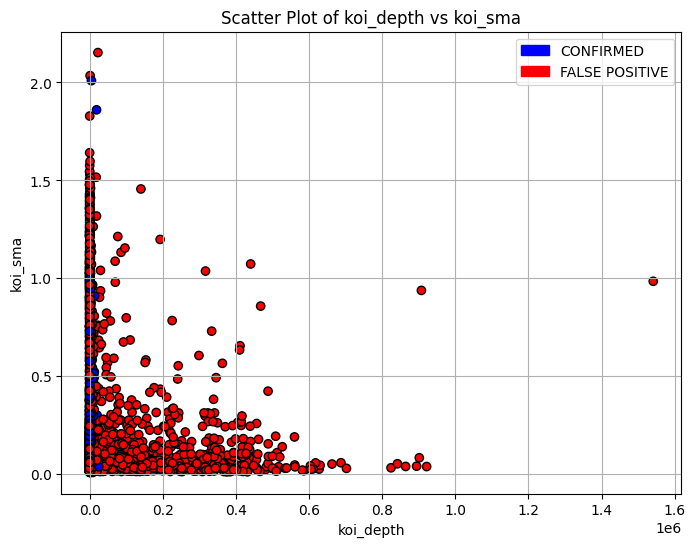

In [42]:

feature1 = 'koi_depth'  
feature2 = 'koi_sma'  

# Extract the values of the selected features
feature1_values = X_train[feature1]
feature2_values = X_train[feature2]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1_values, feature2_values, c=y_train.map({'CONFIRMED': 'blue', 'FALSE POSITIVE': 'red'}), marker='o', edgecolors='k')
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

# Define the legend
blue_patch = mpatches.Patch(color='blue', label='CONFIRMED')
red_patch = mpatches.Patch(color='red', label='FALSE POSITIVE')
plt.legend(handles=[blue_patch, red_patch])

plt.show()



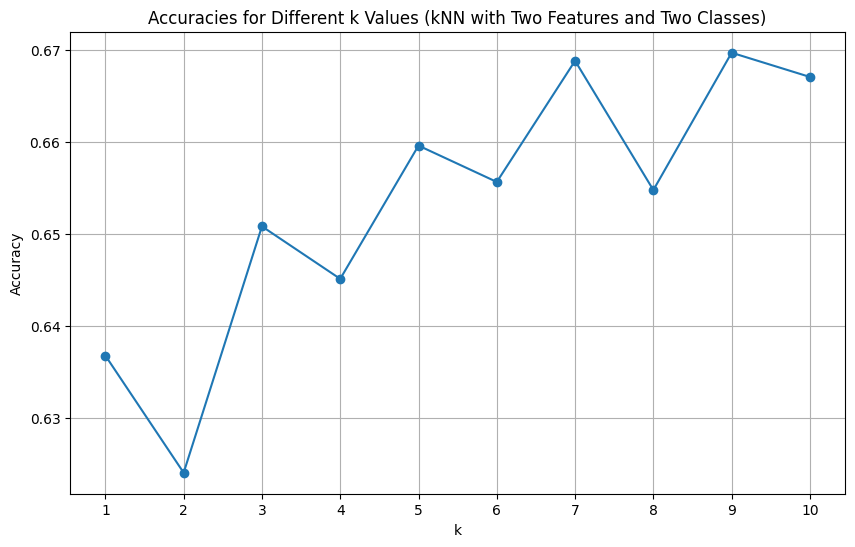

In [45]:
X_train_two_features = X_train[[feature1, feature2]]
X_test_two_features = X_test[[feature1, feature2]]

class_labels = ['CONFIRMED', 'FALSE POSITIVE'] # two classes from confirmed, false positve, and candidates
y_train_two_classes = y_train[y_train.isin (class_labels)]
y_test_two_classes = y_test[y_test.isin (class_labels)]

# k values
k_values = list(range(1, 11))  

# List to store accuracy scores
accuracy_scores = []

# Iterate over each value of k
for k in k_values:
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_two_features, y_train_two_classes)
    y_pred = knn.predict(X_test_two_features)
    accuracy = accuracy_score(y_test_two_classes, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracies for Different k Values (kNN with Two Features and Two Classes)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Best k: 1
Best Accuracy: 0.7798740128969046


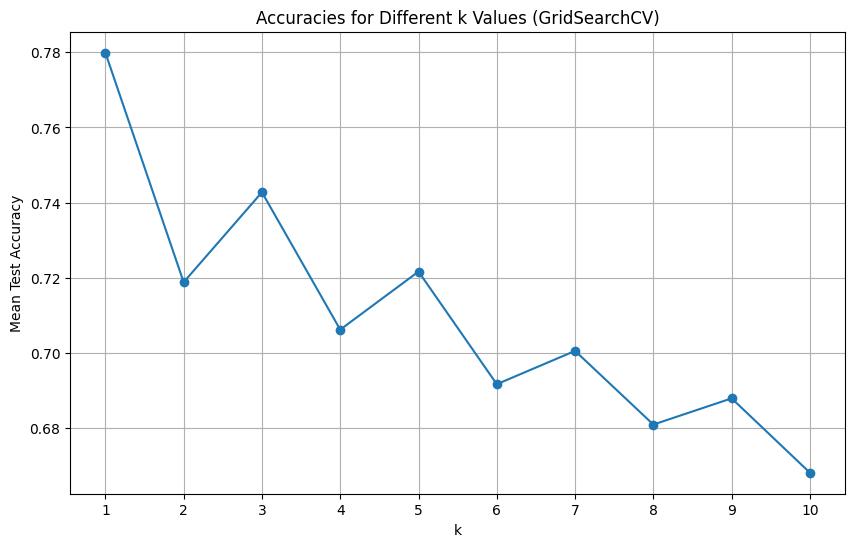

In [ ]:

k_values = list(range(1, 11))

param_grid = {'n_neighbors': k_values}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Accuracies for Different k Values (GridSearchCV)')
plt.xlabel('k')
plt.ylabel('Mean Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Function to convert string values with suffixes 'K' and 'M' to numerical values
def convert_volume(volume_str):
    if volume_str.endswith('K'):
        return float(volume_str[:-1]) * 1e3
    elif volume_str.endswith('M'):
        return float(volume_str[:-1]) * 1e6
    else:
        return float(volume_str)

# Read the Excel sheet
data = pd.read_excel('C:\\Users\\kavya\\Downloads\\ASEB\\SEM 4\\Machine Learning\\Labs\\Lab_5\\lab_3.xlsx', sheet_name='IRCTC Stock Price')

data.drop(columns=['Date'], inplace=True)

data['Volume'] = data['Volume'].apply(convert_volume)

# Encode categorical columns 'Month' and 'Day' using LabelEncoder
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['Day'] = label_encoder.fit_transform(data['Day'])

X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 107.55254580261214
Root Mean Squared Error (RMSE): 10.37075435070237
Mean Absolute Percentage Error (MAPE): 0.42685768496968257
R-squared (R2): 0.9982014671760833
